In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('netflix_users.csv')
df

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14
...,...,...,...,...,...,...,...,...
24995,24996,David Miller,18,Australia,Premium,183.88,Horror,2025-01-18
24996,24997,Jane Miller,17,USA,Premium,112.37,Drama,2024-06-29
24997,24998,Sarah Miller,14,USA,Premium,351.80,Action,2024-10-16
24998,24999,Michael Williams,71,USA,Basic,655.89,Action,2024-08-27


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User_ID            25000 non-null  int64  
 1   Name               25000 non-null  object 
 2   Age                25000 non-null  int64  
 3   Country            25000 non-null  object 
 4   Subscription_Type  25000 non-null  object 
 5   Watch_Time_Hours   25000 non-null  float64
 6   Favorite_Genre     25000 non-null  object 
 7   Last_Login         25000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.5+ MB


In [4]:
df.isnull().sum()

User_ID              0
Name                 0
Age                  0
Country              0
Subscription_Type    0
Watch_Time_Hours     0
Favorite_Genre       0
Last_Login           0
dtype: int64

In [5]:

print(df.columns.tolist())  # Verify the exact spelling/casing

# 2. Convert to datetime if not already
df['Last_Login'] = pd.to_datetime(df['Last_Login'], errors='coerce')

# 3. Get current date
current_date = datetime.now()

# 4. Calculate difference AND convert to days
df['Days_Since_Last_Login'] = (current_date - df['Last_Login']).dt.days

print(df)

['User_ID', 'Name', 'Age', 'Country', 'Subscription_Type', 'Watch_Time_Hours', 'Favorite_Genre', 'Last_Login']
       User_ID              Name  Age    Country Subscription_Type  \
0            1    James Martinez   18     France           Premium   
1            2       John Miller   23        USA           Premium   
2            3        Emma Davis   60         UK             Basic   
3            4       Emma Miller   44        USA           Premium   
4            5        Jane Smith   68        USA          Standard   
...        ...               ...  ...        ...               ...   
24995    24996      David Miller   18  Australia           Premium   
24996    24997       Jane Miller   17        USA           Premium   
24997    24998      Sarah Miller   14        USA           Premium   
24998    24999  Michael Williams   71        USA             Basic   
24999    25000       James Jones   19    Germany           Premium   

       Watch_Time_Hours Favorite_Genre Last_Logi

In [6]:
df['Days_Since_Last_Login']

0        322
1         53
2         65
3        370
4         75
        ... 
24995     71
24996    274
24997    165
24998    215
24999    352
Name: Days_Since_Last_Login, Length: 25000, dtype: int64

In [7]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 100], labels=['Teen', 'Young', 'Adult', 'Senior'])#0-18= Teen : 19-35=Young
df['Age_Group']

0          Teen
1         Young
2        Senior
3         Adult
4        Senior
          ...  
24995      Teen
24996      Teen
24997      Teen
24998    Senior
24999     Young
Name: Age_Group, Length: 25000, dtype: category
Categories (4, object): ['Teen' < 'Young' < 'Adult' < 'Senior']

In [8]:
df

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login,Days_Since_Last_Login,Age_Group
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12,322,Teen
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05,53,Young
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24,65,Senior
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25,370,Adult
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14,75,Senior
...,...,...,...,...,...,...,...,...,...,...
24995,24996,David Miller,18,Australia,Premium,183.88,Horror,2025-01-18,71,Teen
24996,24997,Jane Miller,17,USA,Premium,112.37,Drama,2024-06-29,274,Teen
24997,24998,Sarah Miller,14,USA,Premium,351.80,Action,2024-10-16,165,Teen
24998,24999,Michael Williams,71,USA,Basic,655.89,Action,2024-08-27,215,Senior


In [39]:
df['Churn'] = ((df['Days_Since_Last_Login'] > 30) & 
               (df['Watch_Time_Hours'] < 100)).astype(float)
df['Churn'] 

0        1.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
24995    0.0
24996    0.0
24997    0.0
24998    0.0
24999    0.0
Name: Churn, Length: 25000, dtype: float64

In [40]:
churn_rates = df.groupby('Age_Group')(['Churn'].mean().reset_index()
print(churn_rates)

  Age_Group     Churn
0      Teen  0.109232
1     Young  0.095794
2     Adult  0.096381
3    Senior  0.093377


Churn Definition:

Churn = 1 → Inactive for 30+ days and watch time < 10hrs

Churn = 0 → Active (logged in ≤30 days ago)

Why This Works:

.mean() on a binary column (0/1) calculates the churn rate directly.

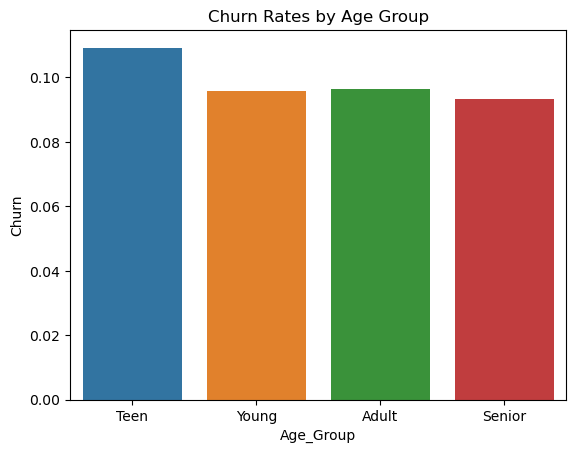

In [41]:
import seaborn as sns
sns.barplot(data=churn_rates, x='Age_Group', y='Churn')
plt.title('Churn Rates by Age Group')
plt.show()

In [42]:
df

,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login,Days_Since_Last_Login,Age_Group,Churn
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12,322,Teen,1.0
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05,53,Young,0.0
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24,65,Senior,1.0
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25,370,Adult,0.0
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14,75,Senior,0.0
...,...,...,...,...,...,...,...,...,...,...,...
24995,24996,David Miller,18,Australia,Premium,183.88,Horror,2025-01-18,71,Teen,0.0
24996,24997,Jane Miller,17,USA,Premium,112.37,Drama,2024-06-29,274,Teen,0.0
24997,24998,Sarah Miller,14,USA,Premium,351.80,Action,2024-10-16,165,Teen,0.0
24998,24999,Michael Williams,71,USA,Basic,655.89,Action,2024-08-27,215,Senior,0.0


In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Subscription_Type and calculate mean churn rate
subscription_churn = df.groupby('Subscription_Type')['Churn'].mean().reset_index()

# Print the results
print(subscription_churn)

  Subscription_Type     Churn
0             Basic  0.093226
1           Premium  0.095453
2          Standard  0.099490


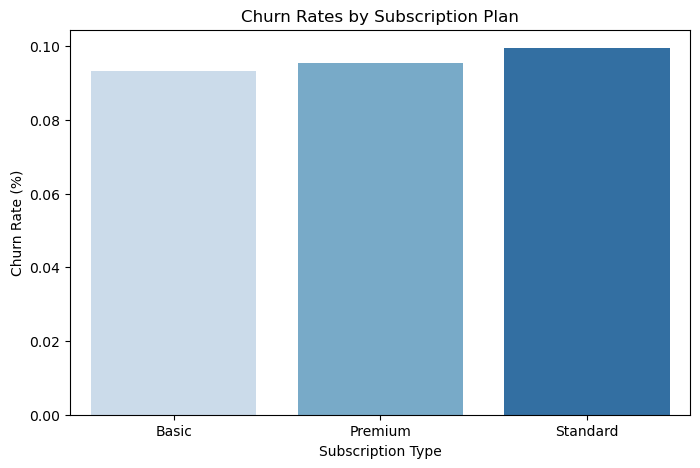

In [44]:
# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=subscription_churn, x='Subscription_Type', y='Churn', palette='Blues')
plt.title('Churn Rates by Subscription Plan')
plt.xlabel('Subscription Type')
plt.ylabel('Churn Rate (%)')

plt.show()

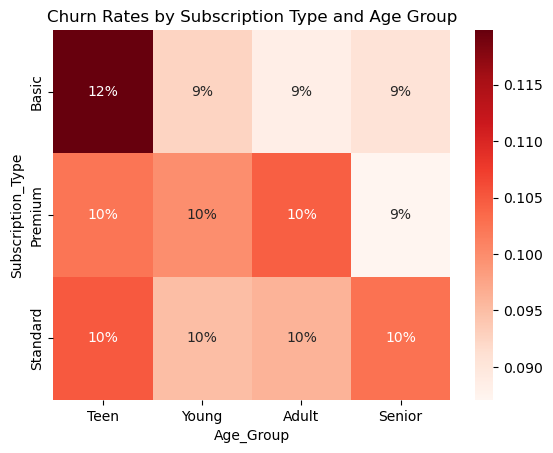

In [45]:
# Cross-tabulation: Subscription Type vs. Age Group
cross_tab = pd.crosstab(
    index=df['Subscription_Type'],
    columns=df['Age_Group'],
    values=df['Churn'],
    aggfunc='mean'
)

sns.heatmap(cross_tab, annot=True, fmt='.0%', cmap='Reds')
plt.title('Churn Rates by Subscription Type and Age Group')
plt.show()

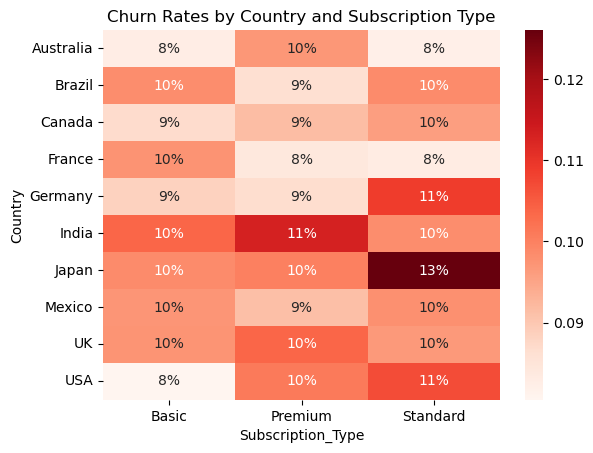

In [49]:
# Cross-tab Country and Subscription Type
heatmap_data = pd.crosstab(df['Country'], df['Subscription_Type'], 
                          values=df['Churn'], aggfunc='mean')

sns.heatmap(heatmap_data, annot=True, fmt='.0%', cmap='Reds')
plt.title('Churn Rates by Country and Subscription Type')
plt.show()

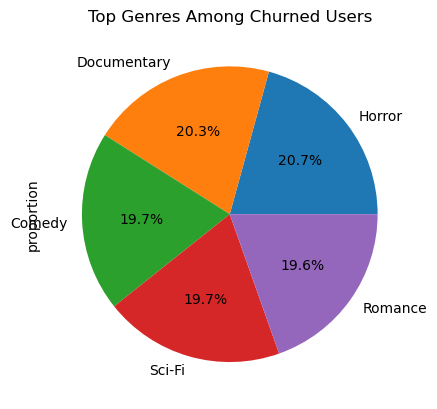

In [54]:
# Top genres among churned users
churned_genres = df[df['Churn'] == 1]['Favorite_Genre'].value_counts(normalize=True)

# Plot
churned_genres.head(5).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top Genres Among Churned Users')
plt.show()

In [61]:
# Group by 3 parameters
segmented_churn = df.groupby(['Age_Group', 'Subscription_Type', 'Country'])['Churn'].mean().reset_index()

# Filter high-risk segments
high_risk = segmented_churn[segmented_churn['Churn'] > 0.13]
print(high_risk)

    Age_Group Subscription_Type  Country     Churn
3        Teen             Basic   France  0.179487
4        Teen             Basic  Germany  0.144928
6        Teen             Basic    Japan  0.166667
11       Teen           Premium   Brazil  0.134831
14       Teen           Premium  Germany  0.176471
22       Teen          Standard   Canada  0.144578
26       Teen          Standard    Japan  0.162500
27       Teen          Standard   Mexico  0.130435
35      Young             Basic    India  0.135135
71      Adult           Premium   Brazil  0.143713
116    Senior          Standard    Japan  0.149718


LOGESTIC REGRESSION

In [71]:
from sklearn.preprocessing import OneHotEncoder

# Encode categorical variables (Subscription_Type, Age_Group, etc.)
encoder = OneHotEncoder(drop='first', sparse=False)#Converts categorical text data into numerical format.
categorical_features = ['Subscription_Type', 'Age_Group', 'Country', 'Favorite_Genre']
encoded_features = encoder.fit_transform(df[categorical_features])

# Create DataFrame for encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [72]:
numeric_features = ['Age', 'Watch_Time_Hours', 'Days_Since_Last_Login']
X_numeric = df[numeric_features]

In [65]:
import numpy as np
X = np.concatenate([X_numeric, encoded_features], axis=1)
y = df['Churn'].values  # Target variable

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4514
         1.0       0.96      0.98      0.97       486

    accuracy                           0.99      5000
   macro avg       0.98      0.99      0.98      5000
weighted avg       0.99      0.99      0.99      5000

Confusion Matrix:
 [[4495   19]
 [  12  474]]
